In [7]:
from experiment_utils.sdrf_cudaexperiment import sdrf_BFc,sdrf_JTc,sdrf_JLc,sdrf_AFc


import torch

import matplotlib.pyplot as plt


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("using device: ", device)

import numpy as np
from tqdm import tqdm
import pandas as pd
import random as random
import os 


import json as json
import seaborn as sns
from matplotlib.ticker import MaxNLocator

os.environ['NUMBA_CUDA_LOW_OCCUPANCY_WARNINGS']='False'

using device:  cuda


In [59]:
def delta_condition_plot_presaved_both():
    
    fig1,ax1 = plt.subplot_mosaic([['Texas_BFc','Texas_BFc','Texas_BFc','.','Cornell_BFc','Cornell_BFc','Cornell_BFc','.','Wisconsin_BFc','Wisconsin_BFc','Wisconsin_BFc','.','Chameleon_BFc','Chameleon_BFc','Chameleon_BFc','.','Cb'],
                                    ['.','.','.','.','.','.','.','.','.','.','.','.','.','.','.','.','Cb'],
                                    ['.','.','Cora_BFc','Cora_BFc','Cora_BFc','.','Citeseer_BFc','Citeseer_BFc','Citeseer_BFc','.','Pubmed_BFc','Pubmed_BFc','Pubmed_BFc','.','.','.','Cb'],
                                    ['.','.','.','.','.','.','.','.','.','.','.','.','.','.','.','.','.'],
                                    ['Texas_BFc_True','Texas_BFc_True','Texas_BFc_True','.','Cornell_BFc_True','Cornell_BFc_True','Cornell_BFc_True','.','Wisconsin_BFc_True','Wisconsin_BFc_True','Wisconsin_BFc_True','.','Chameleon_BFc_True','Chameleon_BFc_True','Chameleon_BFc_True','.','Cb_True'],
                                    ['.','.','.','.','.','.','.','.','.','.','.','.','.','.','.','.','Cb_True'],
                                    ['.','.','Cora_BFc_True','Cora_BFc_True','Cora_BFc_True','.','Citeseer_BFc_True','Citeseer_BFc_True','Citeseer_BFc_True','.','Pubmed_BFc_True','Pubmed_BFc_True','Pubmed_BFc_True','.','.','.','Cb_True'],
                                                                        ],
                                   gridspec_kw = {'width_ratios': [0.01,0.5,0.5,0.01,0.5,0.01,0.5,0.01,0.5,0.01,0.5,0.01,0.5,0.5,0.01,0.005,0.05] ,'height_ratios': [0.80,0.5,0.80,0.6,0.80,0.5,0.80],'hspace': 0},
                                   figsize = (5.5,4.2),dpi = 350)

    loops = {"Texas": 89,
             "Cornell": 126,
             "Wisconsin": 136,
             "Chameleon": 2441,
             "Squirrel": 787,
             "Cora": 100,
             "Citeseer": 84,
             "Pubmed":166}

    ax1['Texas_BFc'].set_ylabel(r"$ \delta_{true}$",fontsize = 7)
    ax1['Cora_BFc'].set_ylabel(r"$ \delta_{true}$",fontsize = 7)

    ax1['Texas_BFc_True'].set_ylabel(r"$ \delta_{true}$",fontsize = 7)
    ax1['Cora_BFc_True'].set_ylabel(r"$ \delta_{true}$",fontsize = 7)


    ax1['Texas_BFc'].text(-0.7,1.15,
                          horizontalalignment = 'left',
                          verticalalignment = 'top',
                          transform = ax1['Texas_BFc'].transAxes,s = r"$\mathbf{a.}$",fontsize = 7)

    ax1['Texas_BFc_True'].text(-0.7,1.15,
                          horizontalalignment = 'left',
                          verticalalignment = 'top',
                          transform = ax1['Texas_BFc_True'].transAxes,s = r"$\mathbf{b.}$",fontsize = 7)
        
    datasets_conditions = {}
    right = 0.98
    top = 0.98



    x = np.arange(0.2,200,0.01)
    y = 1/x 
    
    datasets = ["Texas","Cornell","Wisconsin","Chameleon","Cora","Citeseer","Pubmed"]
    for idxd,datasetname in enumerate(datasets):

        """
        Loading dataset
        """

        sqrt_degree_nr_triangles_gamma_max_delta_max = np.load("results_data/edges_selected_for_rewiring/RewiredEdgesInformation_"+ datasetname +".npy")
        satisfy_conditions = np.load("results_data/edges_selected_for_rewiring/RewiredEdgesSatisfyConditions_"+ datasetname +".npy")       

        if datasetname in ["Cora","Citeseer","Pubmed","Squirrel"]:
    
            ax1[datasetname +'_BFc'].text(right, top,
                        horizontalalignment='right',
                        verticalalignment='top',
                        transform=ax1[datasetname +'_BFc'].transAxes,s = r"$\mathbf{"+datasetname+"}$",fontsize = 5)

            ax1[datasetname +'_BFc_True'].text(right, top,
                        horizontalalignment='right',
                        verticalalignment='top',
                        transform=ax1[datasetname +'_BFc_True'].transAxes,s = r"$\mathbf{"+datasetname+"}$",fontsize = 5)


        elif datasetname in ["Texas","Cornell","Wisconsin","Chameleon"]:
            
            ax1[datasetname +'_BFc'].text(right, top,
                        horizontalalignment='right',
                        verticalalignment='top',
                        transform=ax1[datasetname +'_BFc'].transAxes,s = r"$\mathbf{"+datasetname+"}$",fontsize = 5)

            ax1[datasetname +'_BFc_True'].text(right, top,
                        horizontalalignment='right',
                        verticalalignment='top',
                        transform=ax1[datasetname +'_BFc_True'].transAxes,s = r"$\mathbf{"+datasetname+"}$",fontsize = 5)
        
        
        """
        Plotting edges not satisfying condition
        """


        _ = sns.scatterplot(x  =  sqrt_degree_nr_triangles_gamma_max_delta_max[:,1][~satisfy_conditions[:,1]],y =  sqrt_degree_nr_triangles_gamma_max_delta_max[:,3][~satisfy_conditions[:,1]], ax = ax1[datasetname +'_BFc'],
                                              s = 4,hue = np.array([*range(loops[datasetname])])[~satisfy_conditions[:,1]]*100/loops[datasetname],markers= "X",palette= "YlOrRd" ,edgecolor = 'black',linewidth = 0.1)


        _ = ax1[datasetname +'_BFc'].plot(x,y,color = 'black',ls = '--',linewidth = 0.4,label = r'$y = 1/x$')


        _ = ax1[datasetname +'_BFc'].set_xlim(-0.4,max(sqrt_degree_nr_triangles_gamma_max_delta_max[:,1]) +1 )
        _ = ax1[datasetname +'_BFc'].xaxis.set_major_locator(MaxNLocator(integer=True,nbins = 3))
        if datasetname == "Cora" or datasetname == "Citeseer" or datasetname == "Pubmed" or datasetname == "Squirrel":
            _ = ax1[datasetname +'_BFc'].set_ylim(0,0.6)
                                                
        else:
            _ = ax1[datasetname +'_BFc'].set_ylim(0,np.round(max(sqrt_degree_nr_triangles_gamma_max_delta_max[:,3][~satisfy_conditions[:,1]]) + 0.5,1))
        _ = ax1[datasetname +'_BFc'].set_yticks([0,np.round(max(sqrt_degree_nr_triangles_gamma_max_delta_max[:,3][~satisfy_conditions[:,1]]) ,1)])
        _ = ax1[datasetname +'_BFc'].tick_params(labelsize = 6)
        _ = ax1[datasetname +'_BFc'].set_yscale("symlog")
        

        
        ax1[datasetname +'_BFc'].get_legend().remove()  
        ax1[datasetname +'_BFc'].set_xlabel(r"$\sharp_{\Delta}$",fontsize = 7)
        datasets_conditions[datasetname] = {'condition 1': int(np.sum(satisfy_conditions[:,0])),'condition2': int(np.sum(satisfy_conditions[:,1]))}
        
        if datasetname == "Texas":
            norm = plt.Normalize(np.min(np.array([*range(loops[datasetname])])*100/loops[datasetname]), np.max(np.array([*range(loops[datasetname])])*100/loops[datasetname]))
            sm = plt.cm.ScalarMappable(cmap="YlOrRd", norm=norm)
            sm.set_array([])


            plt.colorbar(sm,cax = ax1['Cb'])
            ax1['Cb'].tick_params(labelsize = 6)
            ax1['Cb'].set_ylabel(r"%",fontsize = 7)
            ax1['Cb'].yaxis.set_label_position('right')

        if datasetname == "Cornell" or datasetname == "Wisconsin" or datasetname == "Chameleon":
            ax1[datasetname +'_BFc'].sharey(ax1['Texas_BFc'])   
            [label.set_visible(False) for label in ax1[datasetname +'_BFc'].get_yticklabels()]
        elif datasetname == "Squirrel" or datasetname == "Citeseer" or datasetname == "Pubmed":
            ax1[datasetname +'_BFc'].sharey(ax1['Cora_BFc'])   
            [label.set_visible(False) for label in ax1[datasetname +'_BFc'].get_yticklabels()]



        """
        Plotting edges satisfying condition
        """

        _ = sns.scatterplot(x  =  sqrt_degree_nr_triangles_gamma_max_delta_max[:,1][satisfy_conditions[:,1]],y =  sqrt_degree_nr_triangles_gamma_max_delta_max[:,3][satisfy_conditions[:,1]], ax = ax1[datasetname +'_BFc_True'],
                                              s = 4,hue = np.array([*range(loops[datasetname])])[satisfy_conditions[:,1]]*100/loops[datasetname],markers= "X",palette= "YlOrRd" ,edgecolor = 'black',linewidth = 0.1)


        _ = ax1[datasetname +'_BFc_True'].plot(x,y,color = 'black',ls = '--',linewidth = 0.4,label = r'$y = 1/x$')


        _ = ax1[datasetname +'_BFc_True'].tick_params(labelsize = 7) 
        _ = ax1[datasetname +'_BFc_True'].set_xlim(-0.4,max(sqrt_degree_nr_triangles_gamma_max_delta_max[:,1][satisfy_conditions[:,1]]) +5 )
        _ = ax1[datasetname +'_BFc_True'].xaxis.set_major_locator(MaxNLocator(integer=True,nbins = 3))
        if datasetname == "Cora" or datasetname == "Citeseer" or datasetname == "Pubmed" or datasetname == "Squirrel":
            _ = ax1[datasetname +'_BFc_True'].set_ylim(0,0.6)
                                                
        else:
            _ = ax1[datasetname +'_BFc_True'].set_ylim(0,np.round(max(sqrt_degree_nr_triangles_gamma_max_delta_max[:,3][satisfy_conditions[:,1]]) + 0.5,1))
        _ = ax1[datasetname +'_BFc_True'].set_yticks([0,np.round(max(sqrt_degree_nr_triangles_gamma_max_delta_max[:,3][satisfy_conditions[:,1]]) ,1)])
        _ = ax1[datasetname +'_BFc_True'].tick_params(labelsize = 6)
        _ = ax1[datasetname +'_BFc_True'].set_yscale("symlog")
        

        ax1[datasetname +'_BFc_True'].set_xlabel(r"$\sharp_{\Delta}$",fontsize = 7)
        ax1[datasetname +'_BFc_True'].get_legend().remove()  

        
        
        if datasetname == "Texas":
            norm = plt.Normalize(np.min(np.array([*range(loops[datasetname])])*100/loops[datasetname]), np.max(np.array([*range(loops[datasetname])])*100/loops[datasetname]))
            sm = plt.cm.ScalarMappable(cmap="YlOrRd", norm=norm)
            sm.set_array([])


            plt.colorbar(sm,cax = ax1['Cb_True'])
            ax1['Cb_True'].tick_params(labelsize = 6)
            ax1['Cb_True'].set_ylabel(r"%",fontsize = 7)
            ax1['Cb_True'].yaxis.set_label_position('right')

        if datasetname == "Cornell" or datasetname == "Wisconsin" or datasetname == "Chameleon":
            ax1[datasetname +'_BFc_True'].sharey(ax1['Texas_BFc_True'])   
            [label.set_visible(False) for label in ax1[datasetname +'_BFc_True'].get_yticklabels()]
        elif datasetname == "Squirrel" or datasetname == "Citeseer" or datasetname == "Pubmed":
            ax1[datasetname +'_BFc_True'].sharey(ax1['Cora_BFc_True'])   
            [label.set_visible(False) for label in ax1[datasetname +'_BFc_True'].get_yticklabels()]
   
        datasets_conditions[datasetname] = {'Edges Rewired': loops[datasetname] ,
                                            'Condition 2': int(np.sum(satisfy_conditions[:,0])),
                                            'Condition 2b': int(np.sum(satisfy_conditions[:,1]))}      
                
    fig1.savefig("results_figures/delta_condition_both.pdf",bbox_inches='tight')

    return datasets_conditions
             

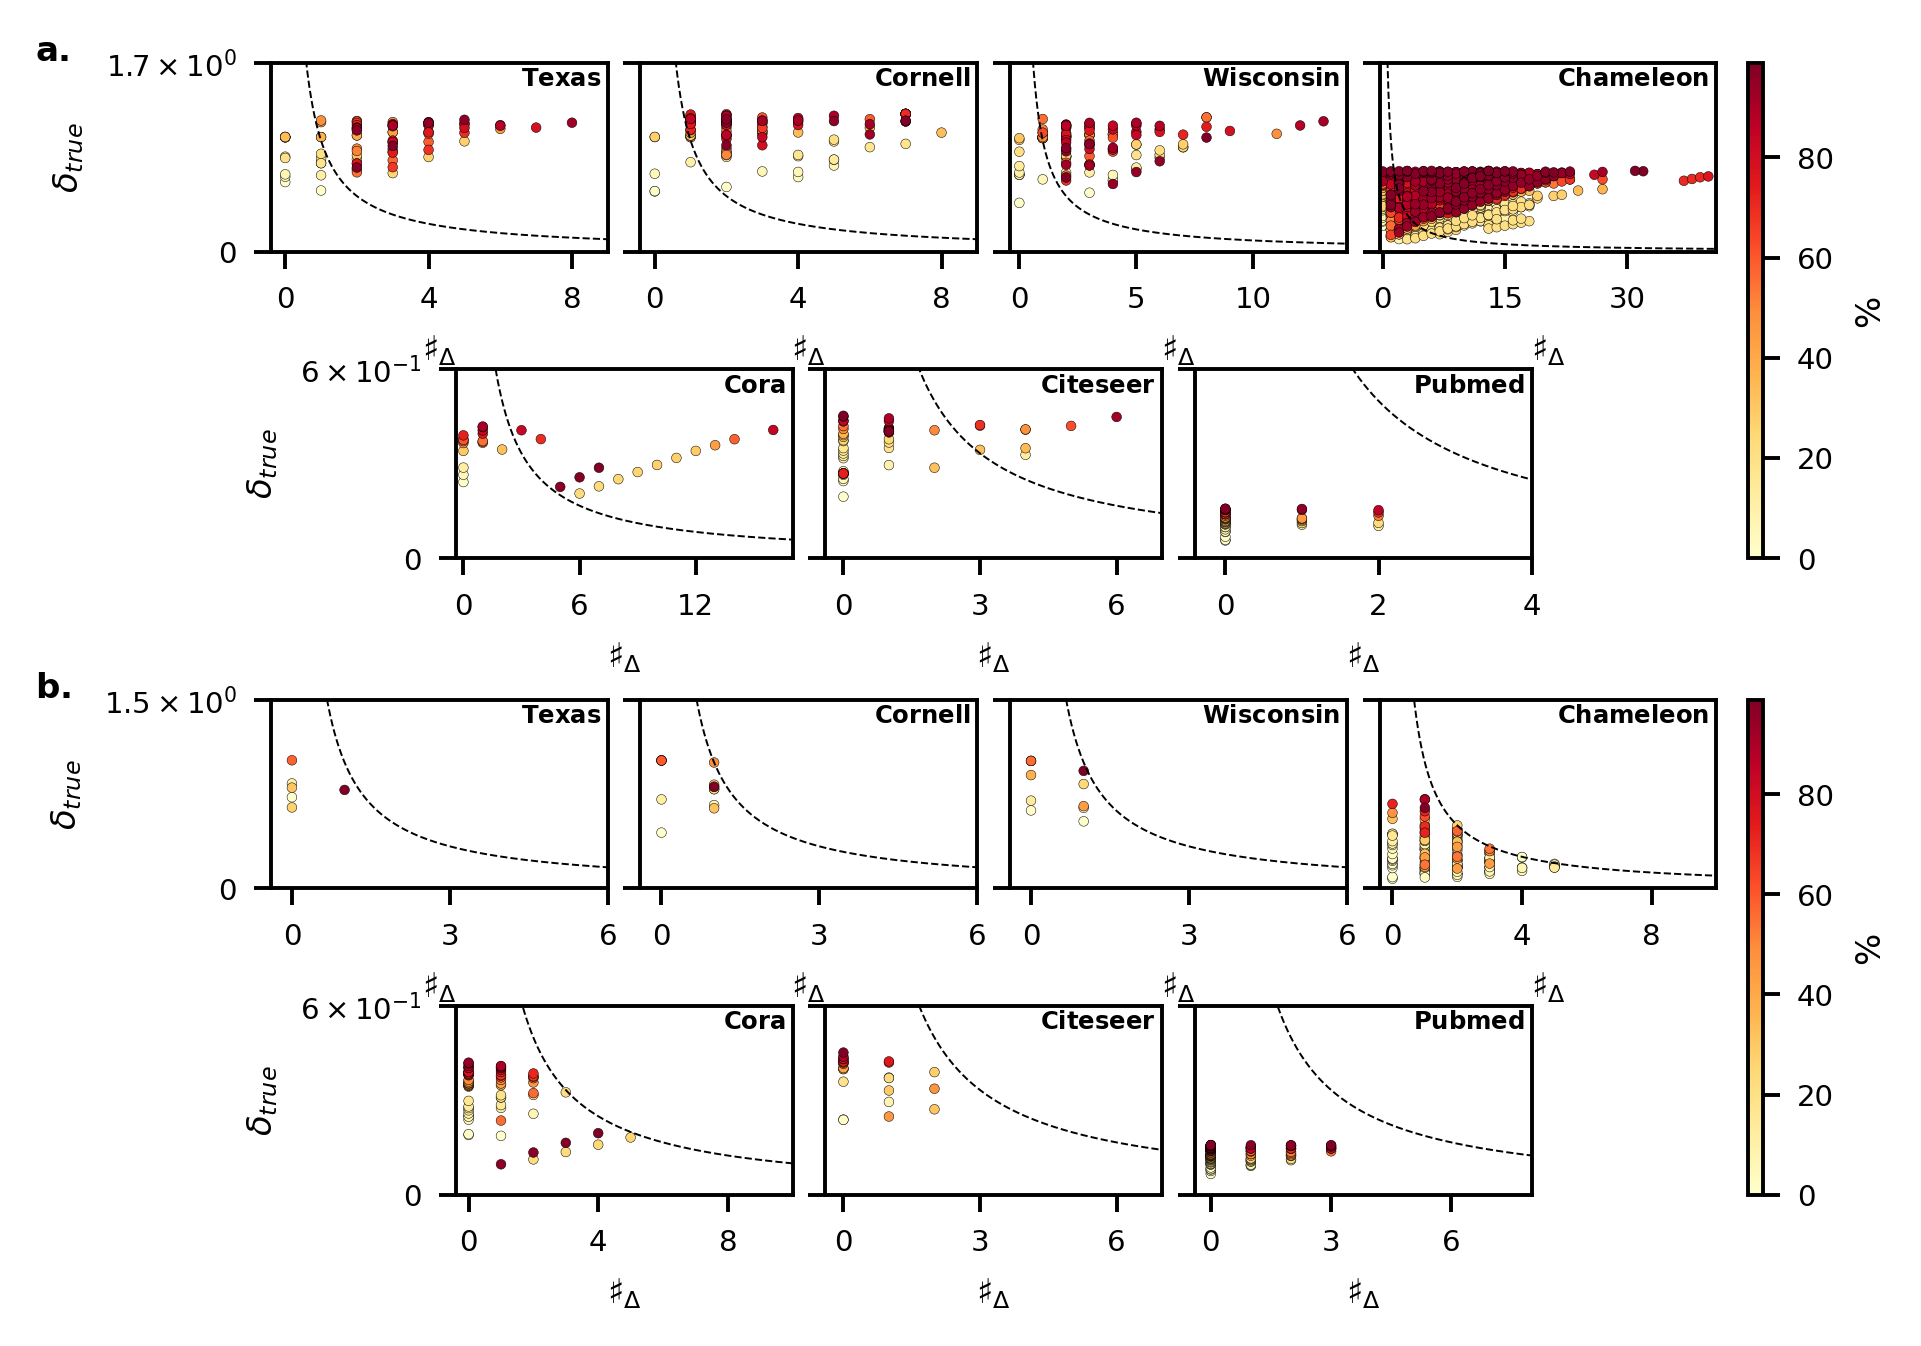

In [60]:
edges_satisfying_conditions_per_dataset = delta_condition_plot_presaved_both()

In [61]:
print(pd.DataFrame(edges_satisfying_conditions_per_dataset))

               Texas  Cornell  Wisconsin  Chameleon  Cora  Citeseer  Pubmed
Edges Rewired     89      126        136       2441   100        84     166
Condition 2        0        0          0          4     0         0      25
Condition 2b       6       15         11        141    68        24     116
